# Projeto e Análise de Algoritmos
## Avaliação Teórica de Algoritmos


Plot Matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_matrix(graph):
  data = graph
  dim = len(data)
  fig, ax = plt.subplots(figsize=(dim, dim))

  ax.matshow(data, cmap='binary_r',  interpolation='nearest')

  for (i, j), z in np.ndenumerate(data):
      ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
              bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

  plt.show()

### Floyd Warshall Algorithm

In [2]:
def floyd_warshall(graph):
  dist = graph
  # Number of vertices in the graph 
  V = len(graph)

  for k in range(V): 
    # pick all vertices as source one by one 
    for i in range(V): 
      # Pick all vertices as destination for the 
      # above picked source 
      for j in range(V): 
        dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

  return dist


### Dijkstra Algorithm

In [3]:
def min_distance(dist, sptSet, V):
  min = float('inf')
  min_index = 0 
  
  for v in range(V):
    if (dist[v] < min and sptSet[v] == False):
      min = dist[v]
      min_index = v 

  return min_index 

In [4]:
def dijkstra(src, graph): 
    V = len(graph)
    dist = [float('inf')] * V
    dist[src] = 0
    sptSet = [False] * V
    
    for cout in range(V):
      u = min_distance(dist, sptSet, V)
      sptSet[u] = True
      for v in range(V):
        if graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + graph[u][v]:
          dist[v] = dist[u] + graph[u][v]

    return dist


In [5]:
def n_djikstra(graph):
  dist_graph = list()
  for i in range(len(graph)):
    dist_graph.append(dijkstra(i, graph))

  return dist_graph

### Exemplo de execução

In [7]:
INF = float('inf')

graph = [
    [0,   5,    INF,  10], 
    [INF, 0,    3,    INF], 
    [INF, INF,  0,    1], 
    [INF, INF,  INF,  0] 
] 

# gera um grafo de n vertices
#graph = np.random.randint(100, size=(5,5))
# atribui a diagonal, valores iguais a 0
#np.fill_diagonal(graph, 0)

floyd_warshall_graph = floyd_warshall(graph)
n_djikstra_graph = n_djikstra(graph)

In [8]:
floyd_warshall_graph == n_djikstra_graph

True

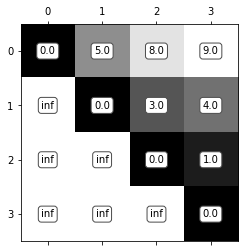

In [9]:
plot_matrix(floyd_warshall_graph)

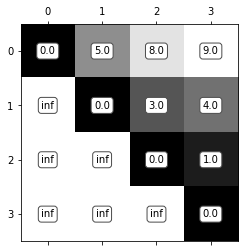

In [10]:
plot_matrix(n_djikstra_graph)

## Análise

### Execução

In [11]:
"""
import random
import time
from datetime import datetime
import numpy as np
import math

# estrutura dos dados
size_time_data = list()
cols = ['size', 'floyd_time', 'djikstra_time']

# semente aleatoria
np.random.seed(42)

# menor valor numero de vertices
N = 1
# maior valor numero de vertices
M = 200

for i in range(N, M):
    
    # gera um grafo de n vertices
    #graph = np.random.randint(pow(2,i), size=(pow(2,i), pow(2,i)))
    graph = np.random.randint(i*5, size=(i*5, i*5))

    # atribui a diagonal, valores iguais a 0
    np.fill_diagonal(graph, 0)

    # floyd
    start_floyd = time.time()
    floyd_warshall(graph)
    end_floyd = time.time()

    delta_time_floyd = end_floyd - start_floyd

    # djikstra
    start_djikstra = time.time()
    n_djikstra(graph)
    end_djikstra = time.time()

    delta_time_djikstra = end_djikstra - start_djikstra

    size_time_data.append([i*5, delta_time_floyd, delta_time_djikstra])

    print('IT: ' + str(i) + ' : ' + str([i*5, delta_time_floyd, delta_time_djikstra]))
"""    

"\nimport random\nimport time\nfrom datetime import datetime\nimport numpy as np\nimport math\n\n# estrutura dos dados\nsize_time_data = list()\ncols = ['size', 'floyd_time', 'djikstra_time']\n\n# semente aleatoria\nnp.random.seed(42)\n\n# menor valor numero de vertices\nN = 1\n# maior valor numero de vertices\nM = 200\n\nfor i in range(N, M):\n    \n    # gera um grafo de n vertices\n    #graph = np.random.randint(pow(2,i), size=(pow(2,i), pow(2,i)))\n    graph = np.random.randint(i*5, size=(i*5, i*5))\n\n    # atribui a diagonal, valores iguais a 0\n    np.fill_diagonal(graph, 0)\n\n    # floyd\n    start_floyd = time.time()\n    floyd_warshall(graph)\n    end_floyd = time.time()\n\n    delta_time_floyd = end_floyd - start_floyd\n\n    # djikstra\n    start_djikstra = time.time()\n    n_djikstra(graph)\n    end_djikstra = time.time()\n\n    delta_time_djikstra = end_djikstra - start_djikstra\n\n    size_time_data.append([i*5, delta_time_floyd, delta_time_djikstra])\n\n    print('IT: 

In [ ]:
#df_fl_dj.to_csv('time_execution_['+str(N)+' - '+str(M)+']_'+str(datetime.now())+'.csv')
#df_fl_dj.to_html('time_execution_['+str(N)+' - '+str(M)+']_'+str(datetime.now())+'.html')

### Exibição dos dados

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('time_execution_[1 - 1000].csv')
#df = pd.read_csv('time_execution_[1 - 101]_2020-09-08 03:38:03.762825.csv')

In [19]:
#df.to_html('time_execution_[1 - 1000].html')

In [20]:
df_fl_dj = df

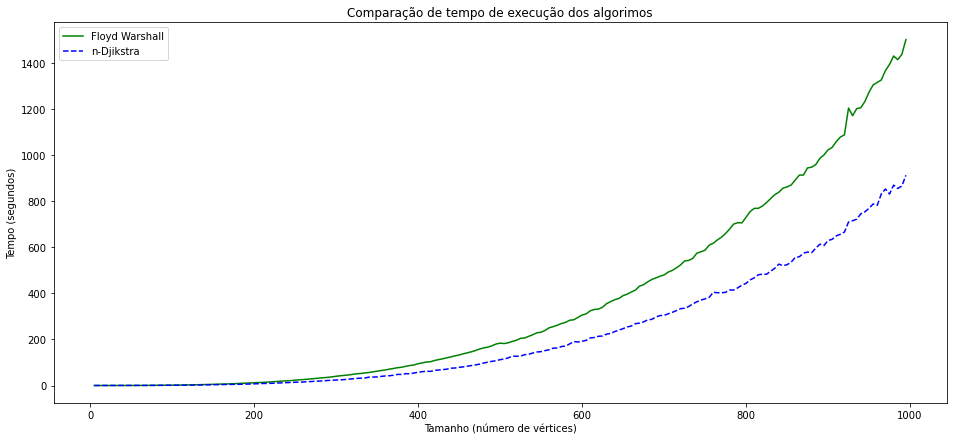

In [21]:
import matplotlib.pyplot as plt
from math import log
import numpy as np

plt.figure(figsize=(16,7))

plt.title('Comparação de tempo de execução dos algorimos')

plt.plot(df_fl_dj['size'], df_fl_dj['floyd_time'], 
        color='green', linestyle='solid')

plt.plot(df_fl_dj['size'], df_fl_dj['djikstra_time'], 
        color='blue', linestyle='dashed')


plt.xlabel('Tamanho (número de vértices)')
#plt.xlabel('Tamanho (número de vértices) $2^{n}$')
plt.ylabel('Tempo (segundos)')

plt.legend(['Floyd Warshall', 'n-Djikstra'])

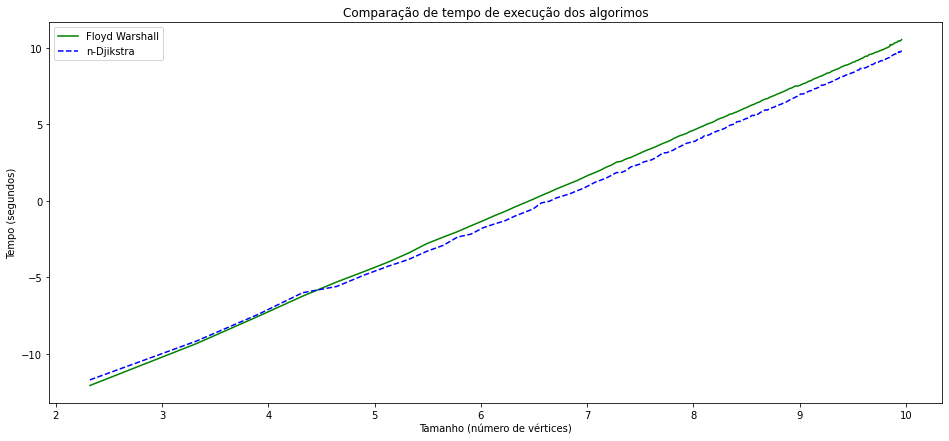

In [22]:
import matplotlib.pyplot as plt
from math import log
import numpy as np

plt.figure(figsize=(16,7))

plt.title('Comparação de tempo de execução dos algorimos')

plt.plot(np.log2(df_fl_dj['size']), np.log2(df_fl_dj['floyd_time']), 
        color='green', linestyle='solid')

plt.plot(np.log2(df_fl_dj['size']), np.log2(df_fl_dj['djikstra_time']), 
        color='blue', linestyle='dashed')


plt.xlabel('Tamanho (número de vértices)')
#plt.xlabel('Tamanho (número de vértices) $2^{n}$')
plt.ylabel('Tempo (segundos)')

plt.legend(['Floyd Warshall', 'n-Djikstra'])

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

lx = np.log2(df_fl_dj['size'])
ly = np.log2(df_fl_dj['djikstra_time'])

model = LinearRegression().fit(lx.values.reshape(-1,1), ly.values)
print(model.coef_)

[2.89823618]


In [34]:
import statsmodels.api as sm

lx = sm.add_constant(lx)
res = sm.OLS(ly, lx).fit()
print(res.conf_int(0.05)[0][1])
print(res.conf_int(0.05)[1][1])

2.886697055520229
2.909775304457411
